In [1]:
from config import *
from pandas import read_csv
import plotnine as pn

In [2]:
true_results = read_csv(
    os.path.join(RESULTS_DIR, "sim_output.csv"),
    dtype={
        "age": "string"
    },
    parse_dates=[2],
    index_col=0
)
true_results.describe()

,sim,date,incidence,prevalence,num_tests,theta,obs_positives,obs_prevalence
count,88200.000000,88200,8.820000e+04,8.820000e+04,88200.000000,8.820000e+04,88200.000000,88200.000000
mean,49.500000,2020-11-12 00:00:00,1.068561e-03,2.095376e-02,271.166667,1.876705e-05,5.162528,0.020922
min,0.000000,2020-08-31 00:00:00,6.618530e-10,2.019754e-08,92.000000,8.170795e-08,0.000000,0.000000
25%,24.750000,2020-10-06 00:00:00,8.668116e-05,1.466611e-03,174.000000,4.377672e-06,0.000000,0.000000
50%,49.500000,2020-11-12 00:00:00,4.319773e-04,9.378496e-03,217.000000,1.324814e-05,2.000000,0.009276
75%,74.250000,2020-12-19 00:00:00,1.406645e-03,2.944812e-02,388.000000,2.522385e-05,7.000000,0.028736
max,99.000000,2021-01-24 00:00:00,2.206374e-02,2.155715e-01,539.000000,1.007181e-04,112.000000,0.315217
std,28.866234,NaN,1.557734e-03,2.848767e-02,148.780789,1.902180e-05,8.301203,0.030376


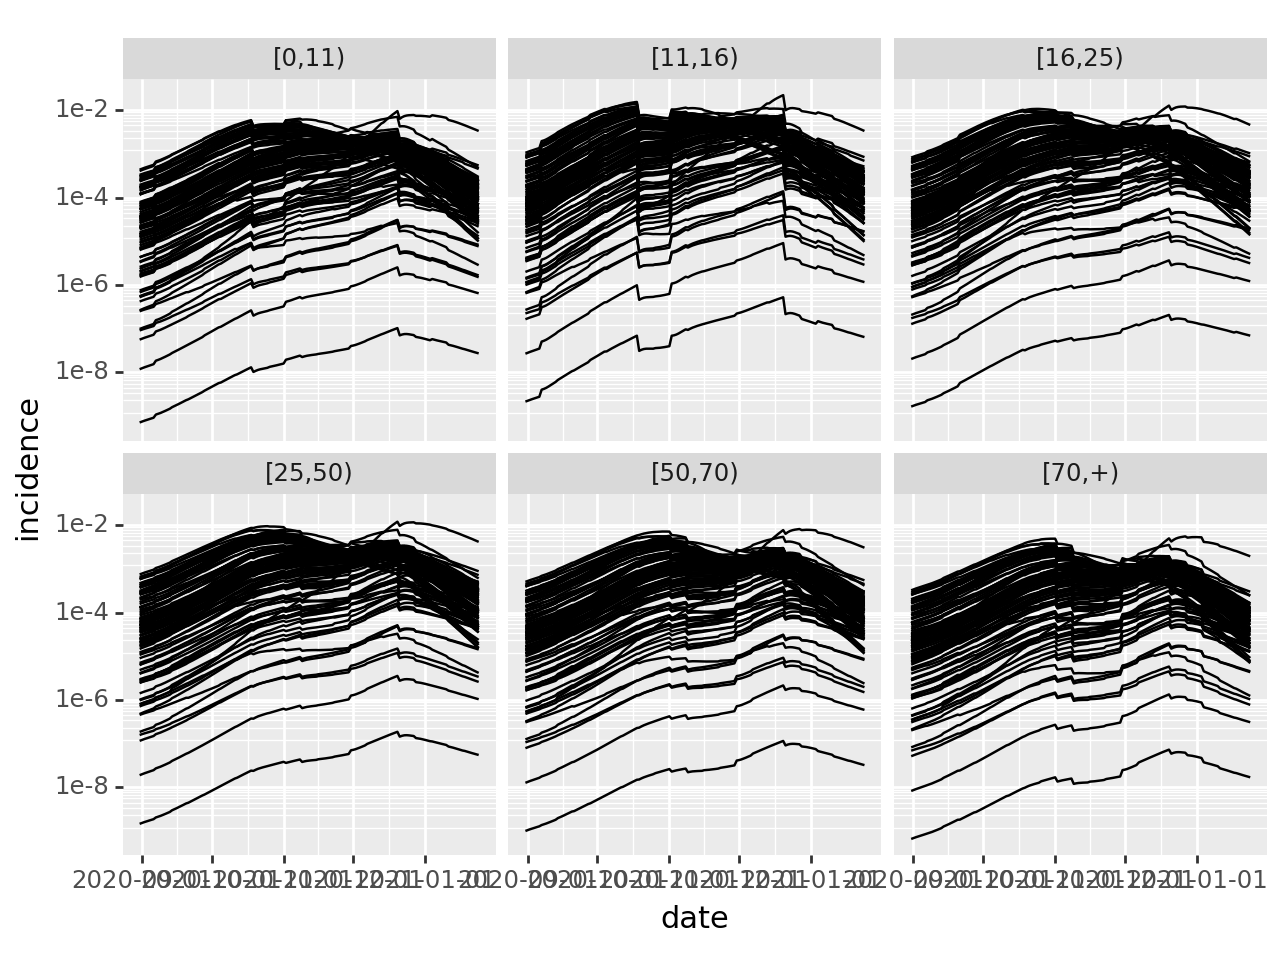

<Figure Size: (640 x 480)>

In [3]:
(
    pn.ggplot(true_results.reset_index(), pn.aes("date", "incidence", group="sim")) +
    pn.geom_line() +
    pn.scale_y_log10() +
    pn.facet_wrap("~age")
)

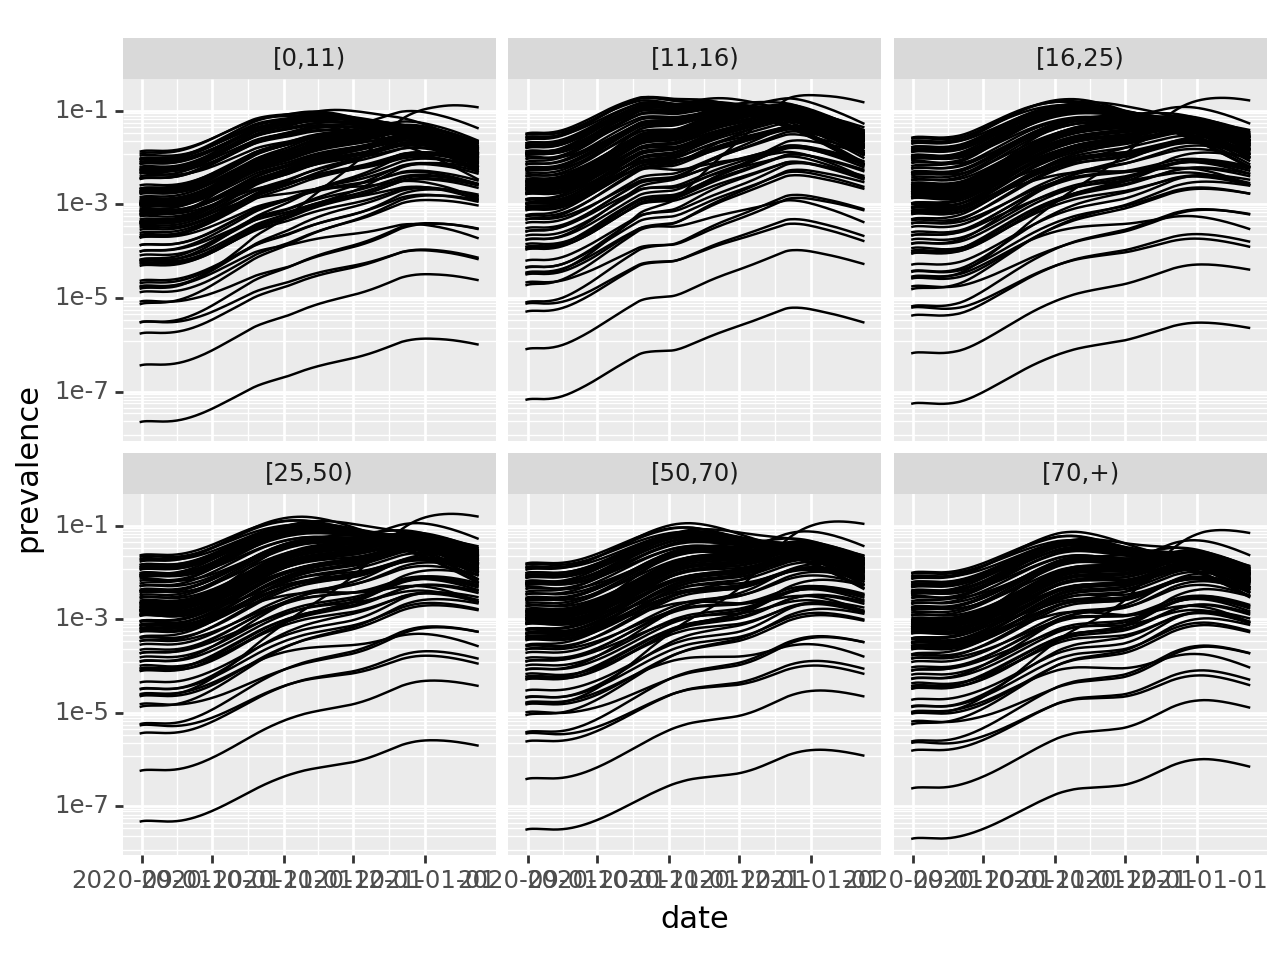

<Figure Size: (640 x 480)>

In [4]:
(
    pn.ggplot(true_results.reset_index(), pn.aes("date", "prevalence", group="sim")) +
    pn.geom_line() +
    pn.scale_y_log10() +
    pn.facet_wrap("~age")
)

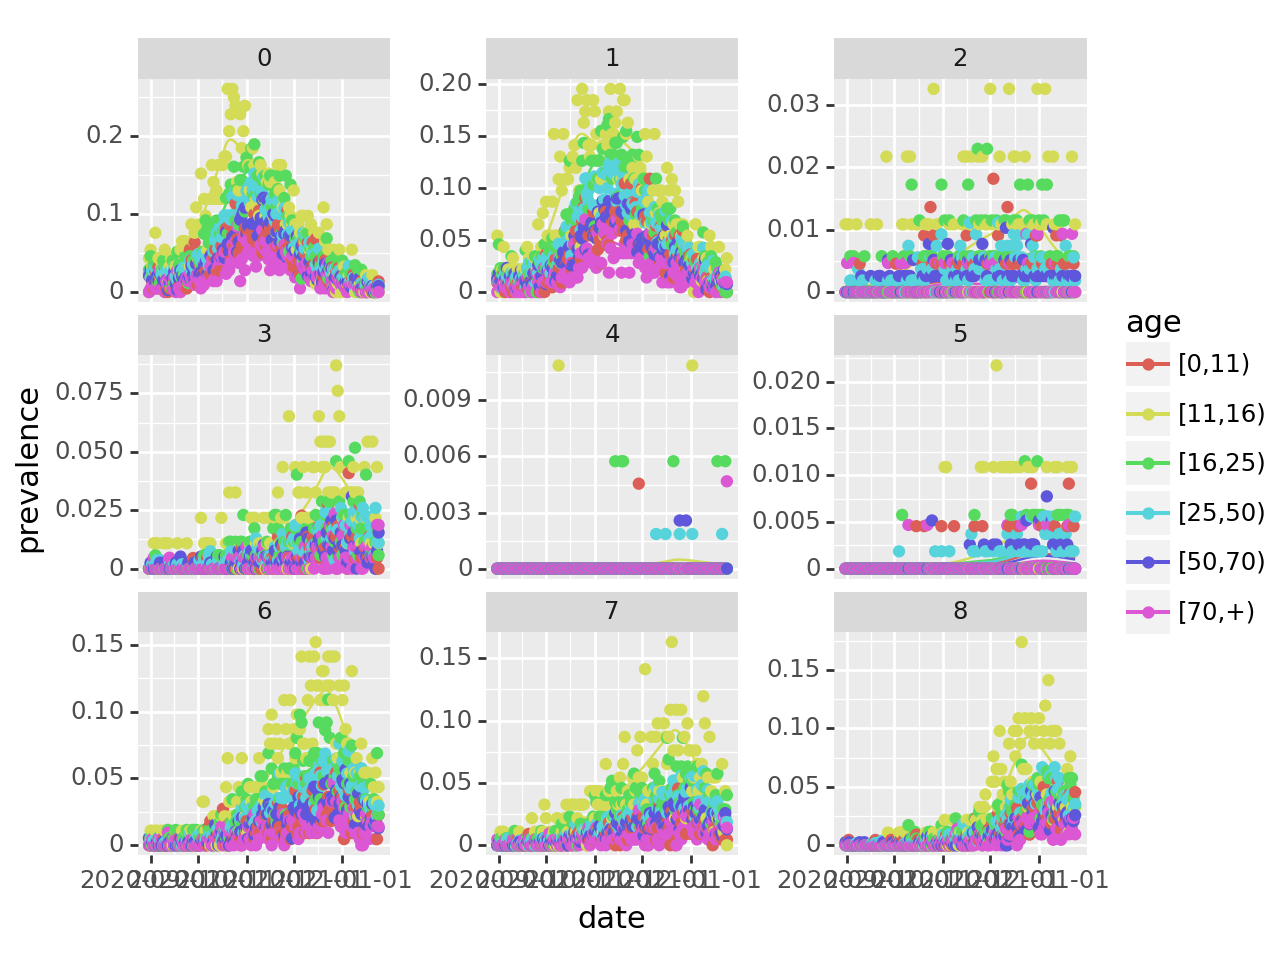

<Figure Size: (640 x 480)>

In [5]:
(
    pn.ggplot(true_results[true_results["sim"] < 9], pn.aes("date", "prevalence", colour = "age")) +
    pn.geom_line() +
    pn.geom_point(pn.aes(y="obs_prevalence")) +
    pn.facet_wrap("~sim",scales="free_y")
)

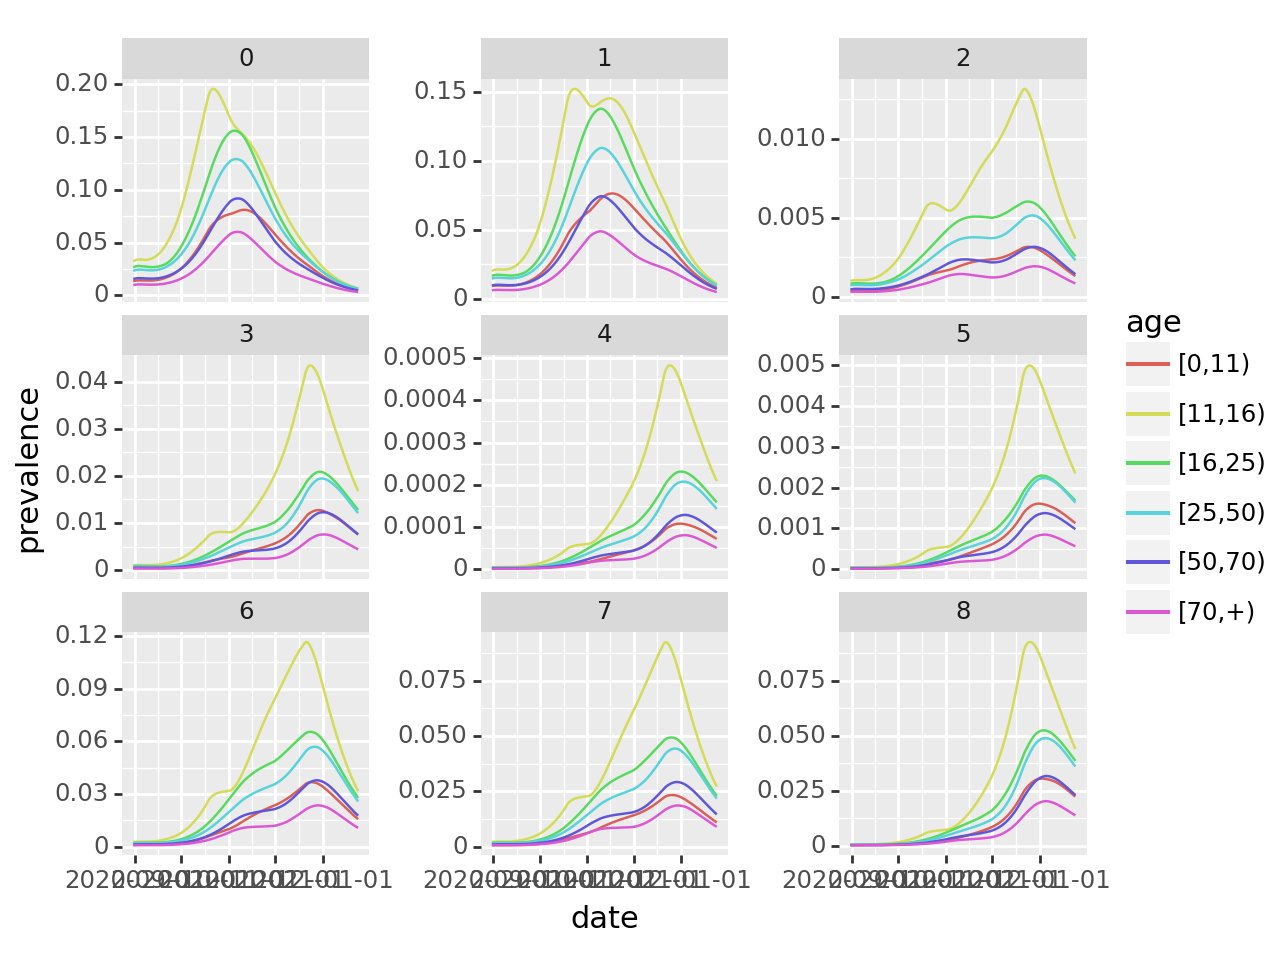

<Figure Size: (640 x 480)>

In [6]:
(
    pn.ggplot(true_results[true_results["sim"] < 9], pn.aes("date", "prevalence", colour = "age")) +
    pn.geom_line() +
    pn.facet_wrap("~sim",scales="free_y")
)